In [1]:
# @hidden_cell
client_id = '4R2GHHINUCVO2KBV0RDCURJOLMZZQOIBJPZ0U55GKI5GHOVC'
client_secret = '0FXMNU2FJVN1IV5Z1U4SCZMQVPNKEOLBTUGPMIK31SPNJDFX'

# Installs and imports libraries

In [2]:
!pip install pgeocode
!pip install folium
!pip install lxml
!pip install scipy

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
from __future__ import division
import pandas as pd
import numpy as np
import datetime
from pandas.io.json import json_normalize
import requests
import pgeocode
import folium
import lxml
import scipy
import pylab
import scipy.spatial
import scipy.cluster
from sklearn.cluster import AgglomerativeClustering

# Establishes a dataframe contains infomation of different types of resteraurants

In [4]:
cat_array=np.array(['English','52e81612bcbc57f1066b7a05','SkyBlue','Caribbean','4bf58dd8d48988d144941735','Lime','Chinese','4bf58dd8d48988d145941735','Red','Filipino','4eb1bd1c3b7b55596b4a748f','Magenta','French','4bf58dd8d48988d10c941735','Blue','German','4bf58dd8d48988d10d941735','LightSteelBlue','Indian','4bf58dd8d48988d10f941735','Yellow','Irish','52e81612bcbc57f1066b7a06','Cyan','Italian','4bf58dd8d48988d110941735','SteelBlue','Jewish','52e81612bcbc57f1066b79fd','Silver','Korean','4bf58dd8d48988d113941735','Pink','Mexican','4bf58dd8d48988d1c1941735','Green','Polish','52e81612bcbc57f1066b7a04','Teal','Portuguese','4def73e84765ae376e57713a','Azure','Russian','5293a7563cf9994f4e043a44','PowDerBlue','South American','4bf58dd8d48988d1cd941735','Olive'])
cat_df=pd.DataFrame(cat_array.reshape(16,3),columns=['Category','Code','Color Index'])
col_list=['Postal Code', 'latitude', 'longitude']+cat_df['Category'].values.tolist()
cat_df

,Category,Code,Color Index
0,English,52e81612bcbc57f1066b7a05,SkyBlue
1,Caribbean,4bf58dd8d48988d144941735,Lime
2,Chinese,4bf58dd8d48988d145941735,Red
3,Filipino,4eb1bd1c3b7b55596b4a748f,Magenta
4,French,4bf58dd8d48988d10c941735,Blue
5,German,4bf58dd8d48988d10d941735,LightSteelBlue
6,Indian,4bf58dd8d48988d10f941735,Yellow
7,Irish,52e81612bcbc57f1066b7a06,Cyan
8,Italian,4bf58dd8d48988d110941735,SteelBlue
9,Jewish,52e81612bcbc57f1066b79fd,Silver


# Establishes the dataframe for New York City, and fills in the coordinates for each postal zone

In [5]:
nyc_postal_list=['10001','10002','10003','10004','10005','10006','10007','10008','10009','10010','10011','10012','10013','10014','10016','10017','10018','10019','10020','10021','10022','10023','10024','10025','10026','10027','10028','10029','10030','10031','10032','10033','10034','10035','10036','10037','10038','10039','10040','10041','10043','10044','10045','10055','10060','10065','10069','10075','10080','10081','10087','10090','10101','10102','10103','10104','10105','10106','10107','10108','10109','10110','10111','10112','10113','10114','10115','10116','10117','10118','10119','10120','10121','10122','10123','10124','10125','10126','10128','10129','10130','10131','10132','10133','10138','10150','10151','10152','10153','10154','10155','10156','10157','10158','10159','10160','10161','10162','10163','10164','10165','10166','10167','10168','10169','10170','10171','10172','10173','10174','10175','10176','10177','10178','10179','10185','10199','10203','10211','10212','10213','10242','10249','10256','10258','10259','10260','10261','10265','10268','10269','10270','10271','10272','10273','10274','10275','10276','10277','10278','10279','10280','10281','10282','10285','10286']
nyc_zip_df=pd.DataFrame({'Postal Code':nyc_postal_list})

nyc_zip_df.shape

(146, 1)

In [6]:
nomi = pgeocode.Nominatim('us')
loc=nomi.query_postal_code(nyc_postal_list)

nyc_food_df=pd.concat([nyc_zip_df,loc], axis=1)
nyc_food_df=nyc_food_df.reindex(columns=col_list)
nyc_food_df.iloc[:,3:19]=0
nyc_food_df

,Postal Code,latitude,longitude,English,Caribbean,Chinese,Filipino,French,German,Indian,Irish,Italian,Jewish,Korean,Mexican,Polish,Portuguese,Russian,South American
0,10001,40.7484,-73.9967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10002,40.7152,-73.9877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10003,40.7313,-73.9892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10004,40.7143,-74.0060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10005,40.7056,-74.0083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,10280,40.7105,-74.0163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142,10281,40.7146,-74.0150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143,10282,40.7166,-74.0146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
144,10285,40.7143,-74.0060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Establishes the dataframe for Toronto, and fills in the coordinates for each postal zone

In [7]:
sourse_html="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

toronto_zip=pd.read_html(sourse_html)
toronto_zip_df=pd.DataFrame(data=toronto_zip[0])
toronto_zip_df.groupby(['Borough']).count()

,Postal Code,Neighborhood
Borough,,
Central Toronto,9,9
Downtown Toronto,19,19
East Toronto,5,5
East York,5,5
Etobicoke,12,12
Mississauga,1,1
North York,24,24
Not assigned,77,0
Scarborough,17,17


In [8]:
toronto_zip_df=toronto_zip_df[~toronto_zip_df['Borough'].isin(['Not assigned'])]
toronto_zip_df=toronto_zip_df[~toronto_zip_df['Borough'].isin(['Mississauga'])]


In [9]:
col='Postal Code'

duplicated=toronto_zip_df.duplicated(col)
duplicated_index=duplicated[duplicated.values==True].index
na_neighborhood_index=toronto_zip_df[toronto_zip_df['Neighborhood']=='Not assigned'].index


if len(duplicated_index)!=0:
    print('There are duplicated rows!')
else:
    print('There is no duplicated row!')
    

if len(na_neighborhood_index)!=0:
    print('There are rows with not assigned neighborhoods!')
else:
    print('There is no row with not assigned neighborhoods!')

There is no duplicated row!
There is no row with not assigned neighborhoods!


In [10]:
toronto_zip_df=toronto_zip_df.drop(['Borough','Neighborhood'],axis=1)
toronto_zip_df=toronto_zip_df.reset_index(drop=True)
toronto_zip_df

,Postal Code
0,M3A
1,M4A
2,M5A
3,M6A
4,M7A
...,...
97,M8X
98,M4Y
99,M7Y
100,M8Y


In [11]:
toronto_postal_list=toronto_zip_df['Postal Code'].tolist()
nomi2 = pgeocode.Nominatim('ca')
loc2=nomi2.query_postal_code(toronto_postal_list)

toronto_food_df=pd.concat([toronto_zip_df,loc2], axis=1)
toronto_food_df=toronto_food_df.reindex(columns=col_list)
toronto_food_df.iloc[:,3:19]=0
toronto_food_df

,Postal Code,latitude,longitude,English,Caribbean,Chinese,Filipino,French,German,Indian,Irish,Italian,Jewish,Korean,Mexican,Polish,Portuguese,Russian,South American
0,M3A,43.7545,-79.3300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M4A,43.7276,-79.3148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,M5A,43.6555,-79.3626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,M6A,43.7223,-79.4504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,M7A,43.6641,-79.3889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,M8X,43.6518,-79.5076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,M4Y,43.6656,-79.3830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99,M7Y,43.7804,-79.2505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,M8Y,43.6325,-79.4939,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Makes calls to collect restaurant counts and saves them to the dataframe for New York City

In [12]:
version = datetime.date.today().strftime('%Y%m%d')
radius=2000
limit=100

In [13]:
for i in range(0, len(nyc_food_df)):
    latitude=nyc_food_df.iloc[i][1]
    longitude=nyc_food_df.iloc[i][2]
    #category=4d4b7105d754a06374d81259 #general categoryid for food
    for j in range(0, len(cat_df)):
        category=cat_df.iloc[j][1]
        url = 'https://api.foursquare.com/v2/venues/search?categoryId= {}&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(category, client_id, client_secret, latitude, longitude, version, radius, limit)
        results = requests.get(url).json()
        if bool(results['response']): 
            ven = results['response']['venues']
            dataframe = json_normalize(ven)
            if 'location.postalCode' in dataframe.columns:
                dataframe_clean=dataframe[dataframe['location.postalCode'].str.contains(nyc_food_df.iloc[i,0],na=False)]
            
                nyc_food_df.iloc[i,j+3]=len(dataframe_clean)
                
    print('Row ',i, ' is completed.')
print('The querry is complete!')

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


Row  0  is completed.
Row  1  is completed.
Row  2  is completed.
Row  3  is completed.
Row  4  is completed.
Row  5  is completed.
Row  6  is completed.
Row  7  is completed.
Row  8  is completed.
Row  9  is completed.
Row  10  is completed.
Row  11  is completed.
Row  12  is completed.
Row  13  is completed.
Row  14  is completed.
Row  15  is completed.
Row  16  is completed.
Row  17  is completed.
Row  18  is completed.
Row  19  is completed.
Row  20  is completed.
Row  21  is completed.
Row  22  is completed.
Row  23  is completed.
Row  24  is completed.
Row  25  is completed.
Row  26  is completed.
Row  27  is completed.
Row  28  is completed.
Row  29  is completed.
Row  30  is completed.
Row  31  is completed.
Row  32  is completed.
Row  33  is completed.
Row  34  is completed.
Row  35  is completed.
Row  36  is completed.
Row  37  is completed.
Row  38  is completed.
Row  39  is completed.
Row  40  is completed.
Row  41  is completed.
Row  42  is completed.
Row  43  is completed

In [14]:
nyc_food_df

,Postal Code,latitude,longitude,English,Caribbean,Chinese,Filipino,French,German,Indian,Irish,Italian,Jewish,Korean,Mexican,Polish,Portuguese,Russian,South American
0,10001,40.7484,-73.9967,1,4,3,0,3,1,3,3,1,0,21,3,0,0,0,5
1,10002,40.7152,-73.9877,1,5,12,4,8,1,5,0,3,7,3,6,0,1,1,6
2,10003,40.7313,-73.9892,0,2,4,2,7,1,9,1,3,1,1,8,1,0,1,4
3,10004,40.7143,-74.0060,0,3,0,0,0,1,1,2,2,0,1,4,0,0,0,1
4,10005,40.7056,-74.0083,0,1,0,0,0,0,4,0,1,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,10280,40.7105,-74.0163,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0
142,10281,40.7146,-74.0150,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
143,10282,40.7166,-74.0146,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
144,10285,40.7143,-74.0060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Then we do the same for Toronto

In [15]:
for i in range(0, len(toronto_food_df)):
    latitude=toronto_food_df.iloc[i][1]
    longitude=toronto_food_df.iloc[i][2]
    for j in range(0, len(cat_df)):
        category=cat_df.iloc[j][1]
        url = 'https://api.foursquare.com/v2/venues/search?categoryId= {}&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(category, client_id, client_secret, latitude, longitude, version, radius, limit)
        results = requests.get(url).json()
        if bool(results['response']): 
            ven = results['response']['venues']
            dataframe = json_normalize(ven)
            if 'location.postalCode' in dataframe.columns:
                dataframe_clean=dataframe[dataframe['location.postalCode'].str.contains(toronto_food_df.iloc[i,0],na=False)]
            
                toronto_food_df.iloc[i,j+3]=len(dataframe_clean)
                
    print('Row ',i, ' is completed.')
print('The querry is complete!')

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


Row  0  is completed.
Row  1  is completed.
Row  2  is completed.
Row  3  is completed.
Row  4  is completed.
Row  5  is completed.
Row  6  is completed.
Row  7  is completed.
Row  8  is completed.
Row  9  is completed.
Row  10  is completed.
Row  11  is completed.
Row  12  is completed.
Row  13  is completed.
Row  14  is completed.
Row  15  is completed.
Row  16  is completed.
Row  17  is completed.
Row  18  is completed.
Row  19  is completed.
Row  20  is completed.
Row  21  is completed.
Row  22  is completed.
Row  23  is completed.
Row  24  is completed.
Row  25  is completed.
Row  26  is completed.
Row  27  is completed.
Row  28  is completed.
Row  29  is completed.
Row  30  is completed.
Row  31  is completed.
Row  32  is completed.
Row  33  is completed.
Row  34  is completed.
Row  35  is completed.
Row  36  is completed.
Row  37  is completed.
Row  38  is completed.
Row  39  is completed.
Row  40  is completed.
Row  41  is completed.
Row  42  is completed.
Row  43  is completed

In [16]:
toronto_food_df

,Postal Code,latitude,longitude,English,Caribbean,Chinese,Filipino,French,German,Indian,Irish,Italian,Jewish,Korean,Mexican,Polish,Portuguese,Russian,South American
0,M3A,43.7545,-79.3300,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M4A,43.7276,-79.3148,0,0,1,1,0,0,2,0,1,0,0,0,0,0,0,0
2,M5A,43.6555,-79.3626,0,2,1,0,3,0,2,0,5,0,0,2,0,0,0,0
3,M6A,43.7223,-79.4504,0,0,5,1,0,0,2,0,1,2,1,5,0,1,0,3
4,M7A,43.6641,-79.3889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,M8X,43.6518,-79.5076,0,1,1,0,1,0,0,0,2,0,0,0,0,0,0,0
98,M4Y,43.6656,-79.3830,0,3,2,0,0,0,1,0,3,0,4,2,1,0,0,0
99,M7Y,43.7804,-79.2505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,M8Y,43.6325,-79.4939,0,0,2,0,0,0,1,0,4,0,0,0,0,0,0,1


# Generates maps to visualize the data

In [17]:
color_list=cat_df['Color Index'].tolist()

nyc_latitude=40.781328
nyc_longitude=-73.966585
nyc_restaurant_map = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=12)

for i in range(0, len(nyc_food_df)):
    lat=nyc_food_df.iloc[i][1]
    long=nyc_food_df.iloc[i][2]
    if nyc_food_df.iloc[i,3:19].max()!=0:
        for j in range(0,16):
            if nyc_food_df.iloc[i,j+3]==nyc_food_df.iloc[i,3:19].max():
                popup=cat_df.iloc[j,0]
                color=color_list[j]
                folium.CircleMarker(
                [lat, long],
                radius=10,
                popup=popup,
                fill=True,
                color=color,
                fill_color=color,
                fill_opacity=0.8
                ).add_to(nyc_restaurant_map)
                j=16
nyc_restaurant_map

In [18]:
toronto_latitude=43.657952
toronto_longitude=-79.387383
toronto_restaurant_map = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=12)

for i in range(0, len(toronto_food_df)):
    lat=toronto_food_df.iloc[i][1]
    long=toronto_food_df.iloc[i][2]
    if toronto_food_df.iloc[i,3:19].max()!=0:
        for j in range(0,16):
            if toronto_food_df.iloc[i,j+3]==toronto_food_df.iloc[i,3:19].max():
                popup=cat_df.iloc[j,0]
                color=color_list[j]
                folium.CircleMarker(
                [lat, long],
                radius=10,
                popup=popup,
                fill=True,
                color=color,
                fill_color=color,
                fill_opacity=0.8
                ).add_to(toronto_restaurant_map)
                j=16
toronto_restaurant_map

# Removes all the rows with all zero data

In [19]:
toronto_food_df['City']='Toronto'
nyc_food_df['City']='New York'
jointed_food_df=pd.concat([nyc_food_df,toronto_food_df], axis=0)
jointed_food_df=jointed_food_df.reset_index(drop=True)
jointed_food_df

#jointed_food_df=jointed_food_df[~jointed_food_df[index]==i]
zero=[]
for i in range(0,len(jointed_food_df)):
    if jointed_food_df.iloc[i,3:19].max()==0:
        zero.append(i)
jointed_food_df=jointed_food_df.drop(zero, axis=0)
jointed_food_df=jointed_food_df.reset_index(drop=True)
jointed_food_df

,Postal Code,latitude,longitude,English,Caribbean,Chinese,Filipino,French,German,Indian,Irish,Italian,Jewish,Korean,Mexican,Polish,Portuguese,Russian,South American,City
0,10001,40.7484,-73.9967,1,4,3,0,3,1,3,3,1,0,21,3,0,0,0,5,New York
1,10002,40.7152,-73.9877,1,5,12,4,8,1,5,0,3,7,3,6,0,1,1,6,New York
2,10003,40.7313,-73.9892,0,2,4,2,7,1,9,1,3,1,1,8,1,0,1,4,New York
3,10004,40.7143,-74.0060,0,3,0,0,0,1,1,2,2,0,1,4,0,0,0,1,New York
4,10005,40.7056,-74.0083,0,1,0,0,0,0,4,0,1,0,0,2,0,0,0,0,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,M5X,43.6492,-79.3823,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Toronto
140,M8X,43.6518,-79.5076,0,1,1,0,1,0,0,0,2,0,0,0,0,0,0,0,Toronto
141,M4Y,43.6656,-79.3830,0,3,2,0,0,0,1,0,3,0,4,2,1,0,0,0,Toronto
142,M8Y,43.6325,-79.4939,0,0,2,0,0,0,1,0,4,0,0,0,0,0,0,1,Toronto


# Calculates the proportions of each restaurant gene for each row

In [20]:
for i in range(0, len(jointed_food_df)):
    if jointed_food_df.iloc[i,3:19].sum()!=0 :
        sum=jointed_food_df.iloc[i,3:19].sum()
        for j in range(3, 19):
            jointed_food_df.iloc[i,j]=jointed_food_df.iloc[i,j]/sum ######
jointed_food_df

,Postal Code,latitude,longitude,English,Caribbean,Chinese,Filipino,French,German,Indian,Irish,Italian,Jewish,Korean,Mexican,Polish,Portuguese,Russian,South American,City
0,10001,40.7484,-73.9967,0.020833,0.083333,0.062500,0.000000,0.062500,0.020833,0.062500,0.062500,0.020833,0.000000,0.437500,0.062500,0.000000,0.000000,0.000000,0.104167,New York
1,10002,40.7152,-73.9877,0.015873,0.079365,0.190476,0.063492,0.126984,0.015873,0.079365,0.000000,0.047619,0.111111,0.047619,0.095238,0.000000,0.015873,0.015873,0.095238,New York
2,10003,40.7313,-73.9892,0.000000,0.044444,0.088889,0.044444,0.155556,0.022222,0.200000,0.022222,0.066667,0.022222,0.022222,0.177778,0.022222,0.000000,0.022222,0.088889,New York
3,10004,40.7143,-74.0060,0.000000,0.200000,0.000000,0.000000,0.000000,0.066667,0.066667,0.133333,0.133333,0.000000,0.066667,0.266667,0.000000,0.000000,0.000000,0.066667,New York
4,10005,40.7056,-74.0083,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.125000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,M5X,43.6492,-79.3823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Toronto
140,M8X,43.6518,-79.5076,0.000000,0.200000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Toronto
141,M4Y,43.6656,-79.3830,0.000000,0.187500,0.125000,0.000000,0.000000,0.000000,0.062500,0.000000,0.187500,0.000000,0.250000,0.125000,0.062500,0.000000,0.000000,0.000000,Toronto
142,M8Y,43.6325,-79.4939,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,Toronto


In [21]:
feature_matrix=jointed_food_df.iloc[:,3:19]
feature_matrix

,English,Caribbean,Chinese,Filipino,French,German,Indian,Irish,Italian,Jewish,Korean,Mexican,Polish,Portuguese,Russian,South American
0,0.020833,0.083333,0.062500,0.000000,0.062500,0.020833,0.062500,0.062500,0.020833,0.000000,0.437500,0.062500,0.000000,0.000000,0.000000,0.104167
1,0.015873,0.079365,0.190476,0.063492,0.126984,0.015873,0.079365,0.000000,0.047619,0.111111,0.047619,0.095238,0.000000,0.015873,0.015873,0.095238
2,0.000000,0.044444,0.088889,0.044444,0.155556,0.022222,0.200000,0.022222,0.066667,0.022222,0.022222,0.177778,0.022222,0.000000,0.022222,0.088889
3,0.000000,0.200000,0.000000,0.000000,0.000000,0.066667,0.066667,0.133333,0.133333,0.000000,0.066667,0.266667,0.000000,0.000000,0.000000,0.066667
4,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.125000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
140,0.000000,0.200000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
141,0.000000,0.187500,0.125000,0.000000,0.000000,0.000000,0.062500,0.000000,0.187500,0.000000,0.250000,0.125000,0.062500,0.000000,0.000000,0.000000
142,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000


# Generates distance matrix between the postal zones

In [22]:
mtx=feature_matrix.to_numpy()
leng = mtx.shape[0]
d_mtx = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        d_mtx[i,j] = scipy.spatial.distance.euclidean(mtx[i], mtx[j])
d_mtx.shape[0]

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


144

# Draws a dendrogram illustatring the hierarchcal clustering process

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


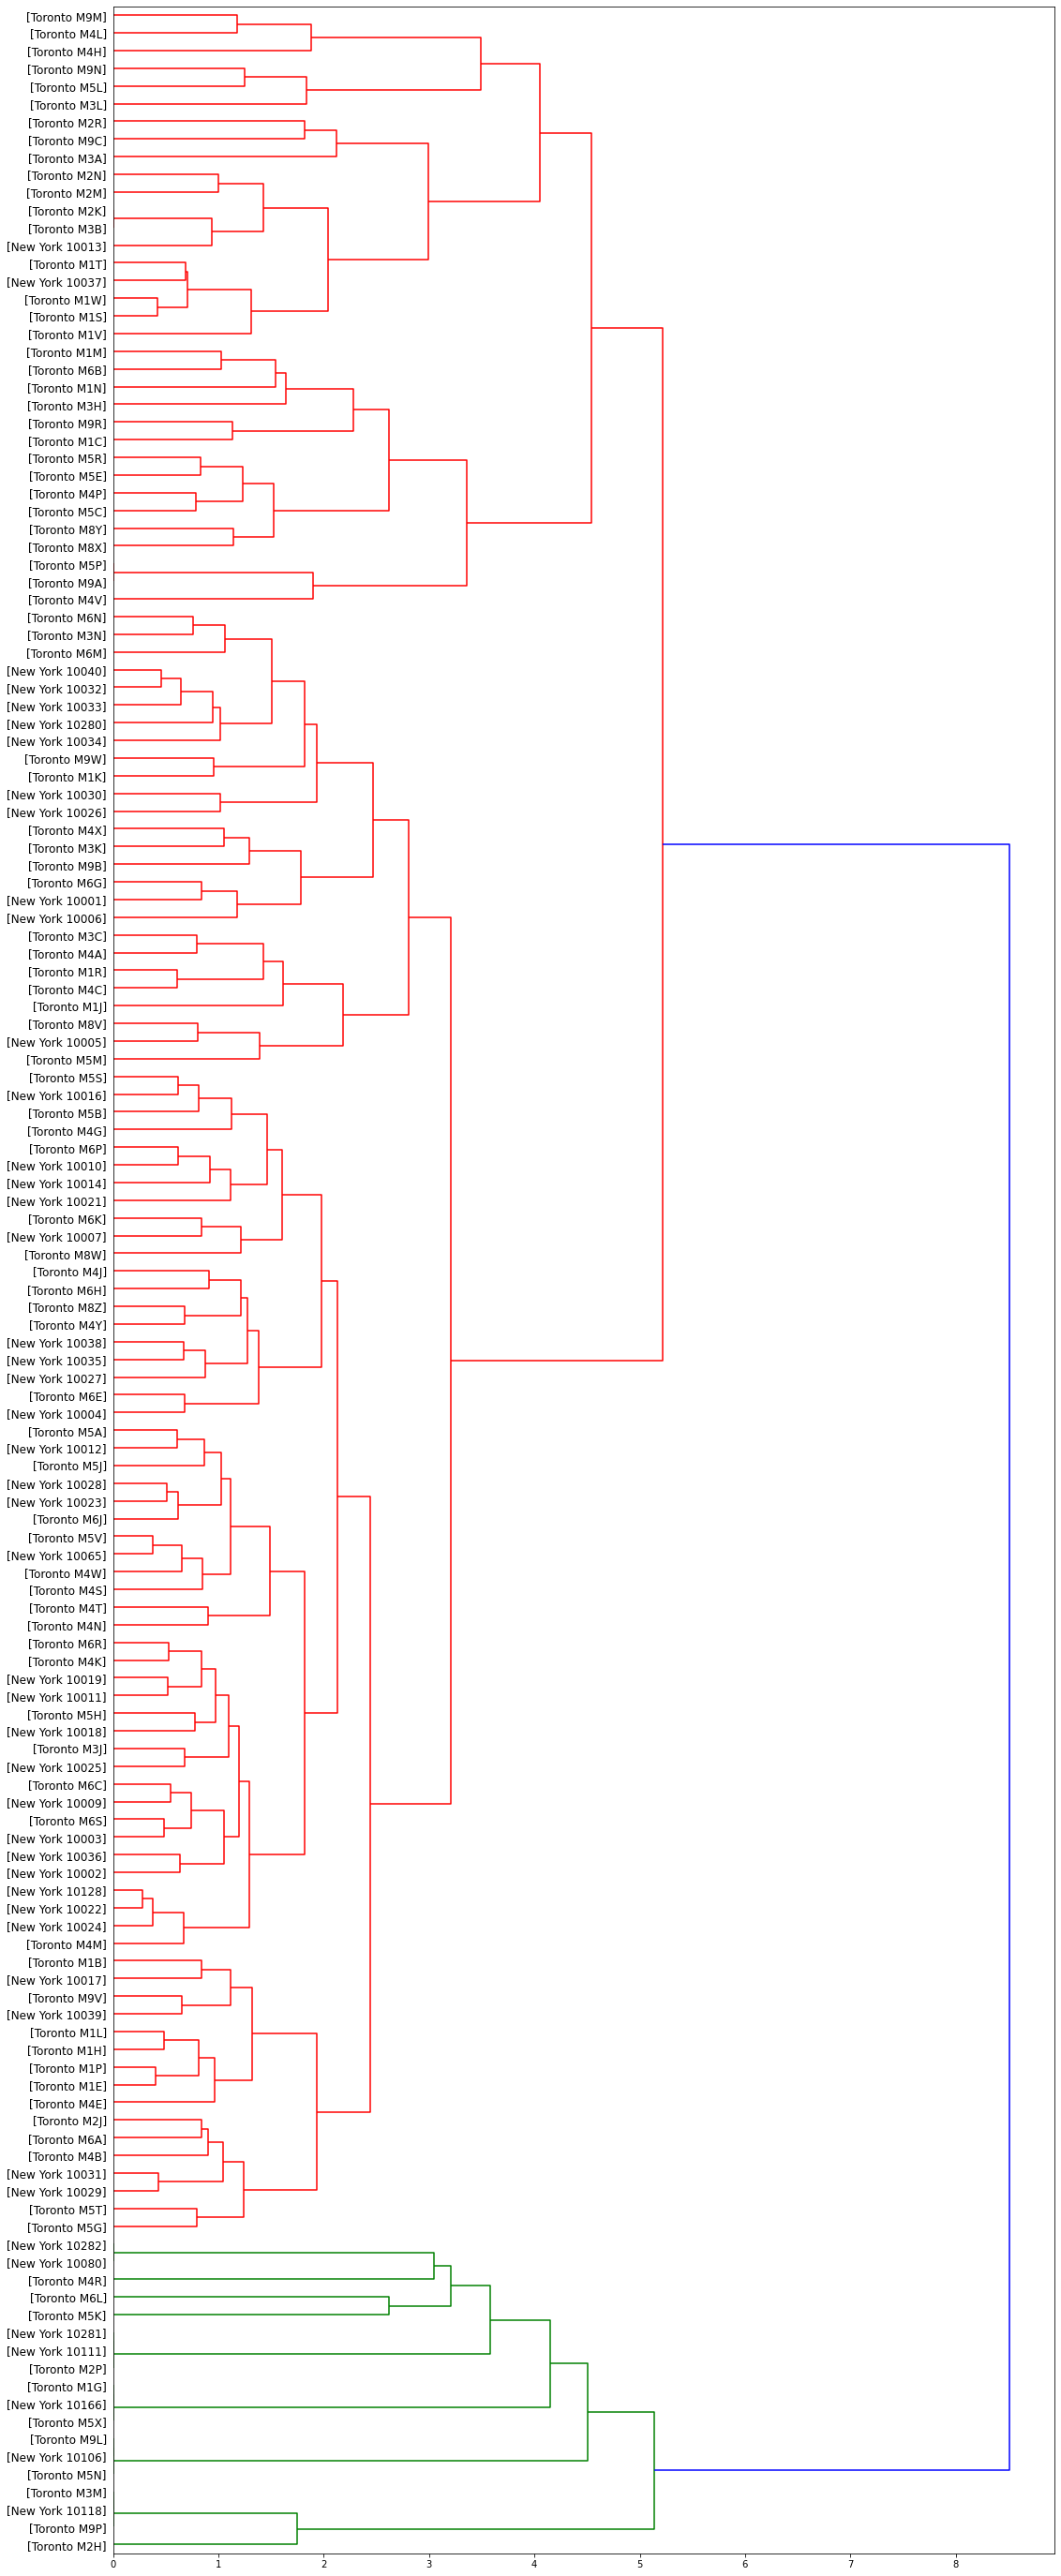

In [23]:
Z = scipy.cluster.hierarchy.linkage(d_mtx, 'complete')
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]' % (jointed_food_df['City'][id], jointed_food_df['Postal Code'][id])
dendro = scipy.cluster.hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right', show_leaf_counts=True)

In [24]:
#3 clusters
agglom = AgglomerativeClustering(n_clusters = 10, linkage = 'complete')
agglom.fit(feature_matrix)
agglom.labels_

array([1, 0, 0, 1, 4, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 9, 1, 0, 1, 0, 3, 2, 6, 9, 0, 4,
       1, 6, 3, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 9, 1, 1,
       0, 1, 4, 0, 1, 1, 1, 9, 0, 4, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       7, 1, 1, 0, 4, 0, 8, 2, 0, 1, 9, 0, 0, 0, 4, 2, 1, 1, 0, 2, 0, 0,
       1, 6, 0, 2, 1, 9, 1, 1, 5, 0, 1, 2, 9, 0, 0, 0, 9, 0, 1, 9, 2, 0,
       4, 0, 9, 0, 0, 0, 0, 4, 0, 1, 2, 1])

In [25]:
jointed_food_df['cluster'] = agglom.labels_
jointed_food_df.head()

,Postal Code,latitude,longitude,English,Caribbean,Chinese,Filipino,French,German,Indian,...,Italian,Jewish,Korean,Mexican,Polish,Portuguese,Russian,South American,City,cluster
0,10001,40.7484,-73.9967,0.020833,0.083333,0.062500,0.000000,0.062500,0.020833,0.062500,...,0.020833,0.000000,0.437500,0.062500,0.000000,0.000000,0.000000,0.104167,New York,1
1,10002,40.7152,-73.9877,0.015873,0.079365,0.190476,0.063492,0.126984,0.015873,0.079365,...,0.047619,0.111111,0.047619,0.095238,0.000000,0.015873,0.015873,0.095238,New York,0
2,10003,40.7313,-73.9892,0.000000,0.044444,0.088889,0.044444,0.155556,0.022222,0.200000,...,0.066667,0.022222,0.022222,0.177778,0.022222,0.000000,0.022222,0.088889,New York,0
3,10004,40.7143,-74.0060,0.000000,0.200000,0.000000,0.000000,0.000000,0.066667,0.066667,...,0.133333,0.000000,0.066667,0.266667,0.000000,0.000000,0.000000,0.066667,New York,1
4,10005,40.7056,-74.0083,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.125000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,New York,4


# Counts the numbers of postal zones of each cluster in Manhattan and Toronto

In [26]:
jointed_food_df.groupby(['cluster','City'])['cluster'].count()

cluster  City    
0        New York    22
         Toronto     40
1        New York    16
         Toronto     30
2        New York     1
         Toronto      9
3        New York     2
4        New York     2
         Toronto      6
5        Toronto      1
6        New York     2
         Toronto      1
7        Toronto      1
8        Toronto      1
9        New York     2
         Toronto      8
Name: cluster, dtype: int64

# Calculates the proportions of 16 restaurant genes in 10 clusters

In [27]:
stat = jointed_food_df.groupby(['cluster'])[cat_df['Category'].tolist()].mean()
stat

,English,Caribbean,Chinese,Filipino,French,German,Indian,Irish,Italian,Jewish,Korean,Mexican,Polish,Portuguese,Russian,South American
cluster,,,,,,,,,,,,,,,,
0,0.004356,0.118399,0.109152,0.044340,0.089269,0.009712,0.144196,0.018263,0.197441,0.017668,0.030201,0.118678,0.004209,0.028043,0.002433,0.063640
1,0.001456,0.136934,0.223425,0.018698,0.021499,0.015879,0.121772,0.013826,0.095548,0.023040,0.097133,0.157400,0.004777,0.008723,0.001927,0.057963
2,0.000000,0.000000,0.108333,0.000000,0.050000,0.000000,0.012500,0.000000,0.691667,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.037500
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.103125,0.004167,0.000000,0.004167,0.000000,0.733333,0.000000,0.044792,0.000000,0.041667,0.039583,0.000000,0.004167,0.000000,0.025000
5,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


# Draws cluster maps for both Manhattan and Toronto

In [28]:
cluster_color_list=['Red','Blue','Yellow','Green','Cyan','Pink','Silver','Lime','Olive','Teal']

toronto_cluster_df=jointed_food_df[jointed_food_df['City']=='Toronto']
toronto_cluster_df=toronto_cluster_df.reset_index(drop=True)

toronto_cluster_map = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=12)

for i in range(0, len(toronto_cluster_df)):
    lat=toronto_cluster_df.iloc[i][1]
    long=toronto_cluster_df.iloc[i][2]
    popup=toronto_cluster_df.loc[i,'cluster']
    color=cluster_color_list[toronto_cluster_df.loc[i,'cluster']]
    folium.CircleMarker(
    [lat, long],
    radius=10,
    popup=popup,
    fill=True,
    color=color,
    fill_color=color,
    fill_opacity=0.8
    ).add_to(toronto_cluster_map)
toronto_cluster_map


In [29]:
nyc_cluster_df=jointed_food_df[jointed_food_df['City']=='New York']
nyc_cluster_df=nyc_cluster_df.reset_index(drop=True)

nyc_cluster_map = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=12)

for i in range(0, len(nyc_cluster_df)):
    lat=nyc_cluster_df.iloc[i][1]
    long=nyc_cluster_df.iloc[i][2]
    popup=nyc_cluster_df.loc[i,'cluster']
    color=cluster_color_list[nyc_cluster_df.loc[i,'cluster']]
    folium.CircleMarker(
    [lat, long],
    radius=10,
    popup=popup,
    fill=True,
    color=color,
    fill_color=color,
    fill_opacity=0.8
    ).add_to(nyc_cluster_map)
nyc_cluster_map